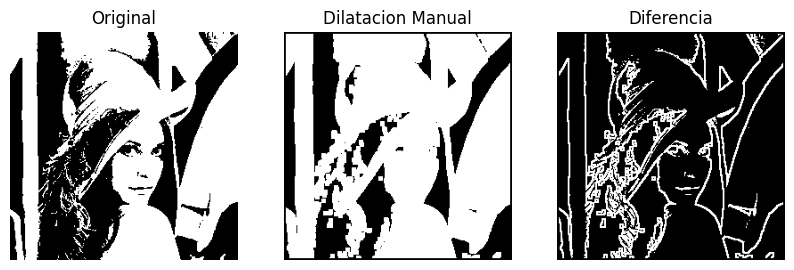

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dilatacion_manual(imagen, kernel):
    altura, ancho = imagen.shape
    kh, kw = kernel.shape

    # Calcula el padding necesario para que el kernel se ajuste completamente a la imagen
    ph = kh // 2
    pw = kw // 2

    # Crea una imagen resultado con el mismo tamaño que la original
    resultado = np.zeros_like(imagen)

    # Aplica la dilatación
    for y in range(ph, altura - ph):
        for x in range(pw, ancho - pw):
            # Extrae la región vecina definida por el tamaño del kernel
            vecindario = imagen[y-ph:y+ph+1, x-pw:x+pw+1]

            # Realiza la operación de dilatación multiplicando el vecindario por el kernel
            resultado[y, x] = np.max(vecindario * kernel)

    return resultado

# Carga la imagen
imagen = cv2.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/lenna.jpg", cv2.IMREAD_GRAYSCALE)

# Binariza la imagen
_, imgB = cv2.threshold(imagen, 120, 255, cv2.THRESH_BINARY)

# Define el kernel en forma de cruz
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]], dtype=np.uint8)

# Aplica la función de dilatación manual
dilatacion_manual_resultado = dilatacion_manual(imgB, kernel)

diferencia = dilatacion_manual_resultado - imgB

# Muestra la imagen original y la imagen después de la dilatación
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(imgB, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilatacion_manual_resultado, cmap='gray')
plt.title('Dilatacion Manual')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(diferencia, cmap='gray')
plt.title('Diferencia')
plt.axis('off')

plt.show()
